In [2]:
import numpy as np
from system.sys_dynamics_casadi import BatteryThermalSystem, SystemParameters
from utils.setup import SimConfiguration, run_simulation
from controllers.thermostat import Thermostat
from controllers.mpc import DMPC, SMPC
from utils.plot_funs import show_results

if __name__ == "__main__":
    try: 
        driving_data = np.load('data/driving_energy.npy', mmap_mode='r')
        velocity_data = np.load('data/driving_velocity.npy', mmap_mode='r')
        print('Datos cargados.')
    except:
        print("Change directory, files not found")
    dt = 1.0
    config = SimConfiguration(
        driving_data = driving_data,
        velocity_data = velocity_data,
        T_amb = 40.0,
        dt = 1.0
    )

    params = SystemParameters()
    init_state = {'T_batt': 30.0, 'T_clnt': 30.0, 'soc': 0.8}
    T_des = 33.0
    horizon = 5
    # ==========================================
    # SIMULACIÓN TERMOSTATO (BASELINE)
    # ==========================================
    print("\n--- Ejecutando Termostato ---")
    env_thermo = BatteryThermalSystem(init_state, params) # Instancia nueva
    ctrl_thermo = Thermostat()
    
    df_thermo = run_simulation(env_thermo, ctrl_thermo, config)

Datos cargados.

--- Ejecutando Termostato ---
> Simulation Thermostat
....Step 0
....Step 300
....Step 600
....Step 900
....Step 1200
....Step 1500
....Step 1800
....Step 2100
....Step 2400
....Step 2700
    Simulation finished
[Thermostat] Total simulation time: 0.688 s | Average time per step (dt = 1.0 s): 0.000251 s


In [3]:
df_thermo

,time,T_batt,T_clnt,soc,w_comp,w_pump,P_driv,P_cooling,P_batt_total,V_oc_pack,I_batt,Q_gen,Q_cool,m_clnt_dot,T_chilled
0,0.0,30.000007,30.000000,0.799993,0.0,0.0,0.000000,0.0,200.000000,375.949351,0.532067,0.359320,0.0,0.0,0.0
1,1.0,30.000013,30.000000,0.799986,0.0,0.0,0.000000,0.0,200.000000,375.948697,0.532068,0.359307,0.0,0.0,0.0
2,2.0,30.000020,30.000000,0.799978,0.0,0.0,0.000000,0.0,200.000000,375.948042,0.532069,0.359293,0.0,0.0,0.0
3,3.0,30.000027,30.000000,0.799971,0.0,0.0,0.000000,0.0,200.000000,375.947387,0.532070,0.359279,0.0,0.0,0.0
4,4.0,30.000033,30.000000,0.799964,0.0,0.0,0.000000,0.0,200.000000,375.946732,0.532071,0.359265,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2735,2735.0,32.699134,28.575014,0.059234,0.0,0.0,-2945.715006,0.0,-2745.715006,331.171984,-8.269862,-77.801591,0.0,0.0,0.0
2736,2736.0,32.698495,28.575014,0.059281,0.0,0.0,-1357.905504,0.0,-1157.905504,331.195137,-3.492390,-34.509411,0.0,0.0,0.0
2737,2737.0,32.698610,28.575014,0.059273,0.0,0.0,-0.000000,0.0,200.000000,331.204908,0.603968,6.216698,0.0,0.0,0.0
2738,2738.0,32.698725,28.575014,0.059265,0.0,0.0,0.000000,0.0,200.000000,331.203218,0.603971,6.217317,0.0,0.0,0.0


In [7]:
df_thermo.describe()

,time,T_batt,T_clnt,soc,w_comp,w_pump,P_driv,P_cooling,P_batt_total,V_oc_pack,I_batt,Q_gen,Q_cool,m_clnt_dot,T_chilled
count,2740.000000,2740.000000,2740.000000,2740.000000,2740.000000,2740.000000,2740.000000,2740.000000,2740.000000,2740.000000,2740.000000,2740.000000,2740.000000,2740.000000,2740.000000
mean,1369.500000,32.083695,29.549317,0.408785,194.890511,259.854015,6729.899754,122.386691,7052.286446,351.859337,20.012735,125.862726,72.874610,0.119225,121.033992
std,791.114193,0.765601,0.636262,0.215325,739.519314,986.025752,10609.389947,464.400866,10603.893603,10.870128,29.249849,237.532428,277.480571,0.452404,459.267997
min,0.000000,30.000007,28.575014,0.058205,0.000000,0.000000,-17490.945480,0.000000,-17290.945480,330.979664,-41.359762,-228.540129,0.000000,0.000000,0.000000
25%,684.750000,31.847888,28.616320,0.216460,0.000000,0.000000,0.000000,0.000000,200.000000,343.827738,0.564029,-2.160108,0.000000,0.000000,0.000000
50%,1369.500000,32.045586,30.000000,0.444242,0.000000,0.000000,4871.722020,0.000000,5112.101426,351.803698,14.767903,15.566032,0.000000,0.000000,0.000000
75%,2054.250000,32.553211,30.000000,0.588542,0.000000,0.000000,12516.997850,0.000000,12833.387618,359.693952,37.299155,163.101957,0.000000,0.000000,0.000000
max,2739.000000,33.507189,30.000000,0.799993,3000.000000,4000.000000,55708.555347,1883.929967,55908.555347,375.949351,103.369726,1665.094929,1487.249701,1.835262,1863.107513


In [17]:
print(f"Velocity data statistics")
print("std", velocity_data.std())
print("mean", velocity_data.mean())
print("min", velocity_data.min())
print("max", velocity_data.max())
print("25%", np.quantile(velocity_data, 0.25))

Velocity data statistics
std 6.567277924015467
mean 8.751999018978104
min 0.0
max 25.347168
25% 2.592832


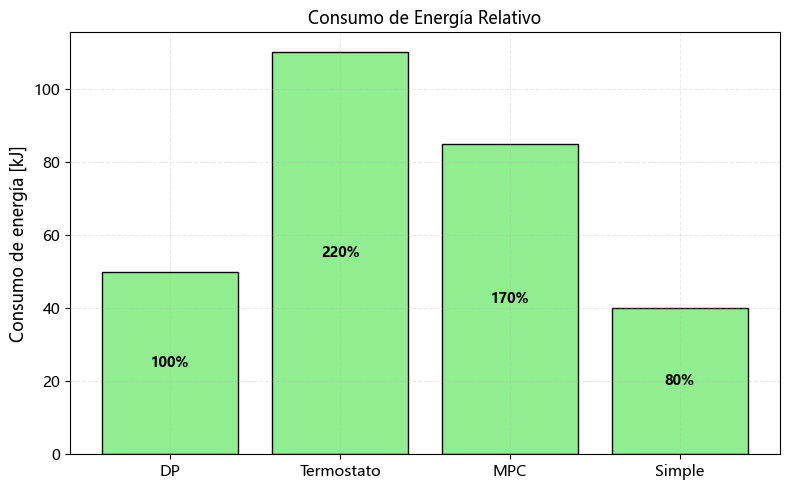

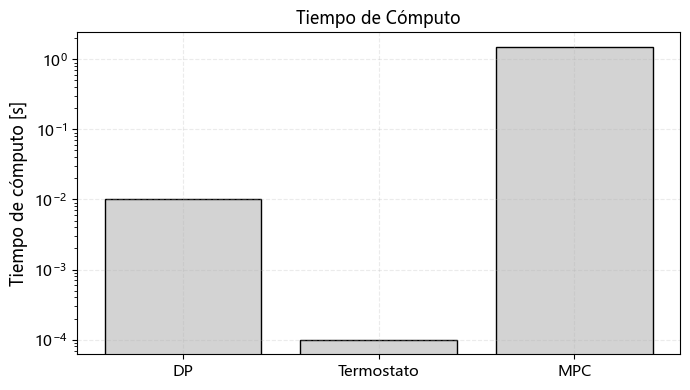

In [13]:
import matplotlib.pyplot as plt
import numpy as np # Necesario para el ejemplo

def plot_energy_and_time(
    labels,
    energy_consumption,
    time_computation,
    baseline_label='DP' # Etiqueta de referencia para el 100%
):
    # -------------------------
    # Gráfico de consumo de energía
    # -------------------------
    fig, ax = plt.subplots(figsize=(8, 5)) # Un poco más grande para que se lea bien

    bars = ax.bar(labels, energy_consumption, color='lightgreen', edgecolor='black')
    ax.set_ylabel("Consumo de energía [kJ]")
    ax.set_title("Consumo de Energía Relativo")

    # --- INICIO: Bloque añadido para calcular y mostrar porcentajes ---

    # 1. Encontrar el valor de energía de la barra de referencia (el 100%)
    try:
        baseline_index = labels.index(baseline_label)
        baseline_energy = energy_consumption[baseline_index]
    except ValueError:
        print(f"Error: La etiqueta de referencia '{baseline_label}' no se encontró en las etiquetas.")
        # Si no se encuentra la referencia, no se añaden los porcentajes
        baseline_energy = 0

    # 2. Añadir el texto del porcentaje en cada barra
    if baseline_energy > 0:
        for i, bar in enumerate(bars):
            # Obtener la altura (valor de energía) de la barra actual
            energy_value = bar.get_height()
            
            # Calcular el porcentaje relativo a la referencia
            percentage = (energy_value / baseline_energy) * 100
            
            # Formatear el texto (ej. "220%")
            label_text = f'{percentage:.0f}%'
            
            # Posicionar el texto en el centro de la barra
            # ax.text(x, y, texto, ...)
            ax.text(
                bar.get_x() + bar.get_width() / 2, # Posición X (centro de la barra)
                bar.get_height() / 2,              # Posición Y (mitad de la altura)
                label_text,                        # El texto a mostrar
                ha='center',                       # Alineación horizontal centrada
                va='center',                       # Alineación vertical centrada
                color='black',                     # Color del texto para contraste
                fontweight='bold'                  # Texto en negrita para mejor visibilidad
            )

    # --- FIN: Bloque añadido ---

    plt.tight_layout()
    plt.show()

    # -------------------------
    # Gráfico de tiempo de cómputo
    # -------------------------
    causal_labels = []
    causal_times = []
    nc_labels = []

    for label, t in zip(labels, time_computation):
        if isinstance(t, str):  # e.g. "NC"
            nc_labels.append(label)
        else:
            causal_labels.append(label)
            causal_times.append(t)

    fig, ax = plt.subplots(figsize=(7, 4))
    
    if causal_labels: # Solo graficar si hay datos
        ax.bar(causal_labels, causal_times, color='lightgray', edgecolor='black')
        ax.set_ylabel("Tiempo de cómputo [s]")
        ax.set_yscale("log")  # muy importante para 1e-5 – 1e-2
        ax.set_title("Tiempo de Cómputo")

    plt.tight_layout()
    plt.show()


_labels = ["DP", "Termostato", "MPC", "Simple"]
mis_consumos = [50, 110, 85, 40]  # DP=50, Termostato=110 (220% de 50), etc.
mis_tiempos = [0.01, 0.0001, 1.5, "NC"] # "NC" para No Causal

# Llamar a la función con los datos
plot_energy_and_time(
    labels=_labels,
    energy_consumption=mis_consumos,
    time_computation=mis_tiempos
)